In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Exploratory data analysis

In [2]:
data_sample = pd.read_csv("expedia_sample.csv")

In [3]:
data_sample.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,8879178,2014-03-21 15:11:37,2,3,66,174,24103,2211.6376,970569,0,...,0,5,15093,1,0,2,2,50,679,6
1,37432400,2014-09-08 07:37:35,2,3,66,258,13134,1479.4293,381438,0,...,0,1,5405,6,0,1,4,8,126,65
2,14622799,2014-10-17 15:30:05,10,0,182,416,32100,3163.3209,390956,0,...,0,2,22648,6,0,1,4,13,1531,62
3,23090242,2014-05-18 13:49:51,8,4,77,871,20821,7692.1806,980271,0,...,0,1,8276,1,0,1,2,50,661,18
4,15102426,2014-09-16 15:39:04,2,3,27,418,22879,NaN,530165,0,...,0,1,8550,6,1,1,4,8,121,21


In [4]:
data_sample.reset_index(drop=True)
data_sample

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,8879178,2014-03-21 15:11:37,2,3,66,174,24103,2211.6376,970569,0,...,0,5,15093,1,0,2,2,50,679,6
1,37432400,2014-09-08 07:37:35,2,3,66,258,13134,1479.4293,381438,0,...,0,1,5405,6,0,1,4,8,126,65
2,14622799,2014-10-17 15:30:05,10,0,182,416,32100,3163.3209,390956,0,...,0,2,22648,6,0,1,4,13,1531,62
3,23090242,2014-05-18 13:49:51,8,4,77,871,20821,7692.1806,980271,0,...,0,1,8276,1,0,1,2,50,661,18
4,15102426,2014-09-16 15:39:04,2,3,27,418,22879,NaN,530165,0,...,0,1,8550,6,1,1,4,8,121,21
5,29671208,2014-07-19 16:36:39,2,3,66,442,3602,977.1934,988598,1,...,0,1,27076,6,1,1,2,50,641,32
6,26586680,2014-07-24 08:53:25,2,3,66,442,21439,271.4436,1030166,0,...,1,1,589,1,0,1,2,50,1265,7
7,25102455,2013-09-14 15:58:50,2,3,66,174,26232,373.9019,1162617,0,...,1,1,3072,3,0,2,2,50,366,2
8,7037664,2013-03-09 08:27:02,2,3,66,174,15081,2551.9786,263022,1,...,0,1,669,3,0,1,2,50,212,56
9,27416045,2014-07-08 18:39:52,15,1,55,448,16999,NaN,1017922,0,...,0,3,8245,1,1,1,6,22,245,8


In [5]:
data_sample.columns

Index(['Unnamed: 0', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [6]:
data_sample['hotel_cluster'].value_counts().sort_index()

0     10165
1     11864
2     11508
3      6019
4      9329
5     16292
6     10223
7      6658
8      8776
9     12859
10    10756
11     9465
12     6842
13     9221
14     5128
15     8659
16    12580
17     9218
18    14467
19     7519
20     8117
21    14580
22     7719
23     6833
24     4400
25    14111
26    10257
27     2800
28    13610
29    10979
      ...  
70    14475
71     5649
72    12157
73     8960
74     1306
75     4471
76     8654
77    10767
78     9824
79     7549
80     5903
81     9216
82    13414
83    14019
84     7468
85     9646
86     5524
87     6892
88     2957
89     6416
90    10604
91    27795
92     6403
93     5711
94     7610
95    13415
96     9746
97    12686
98    15623
99    11712
Name: hotel_cluster, Length: 100, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


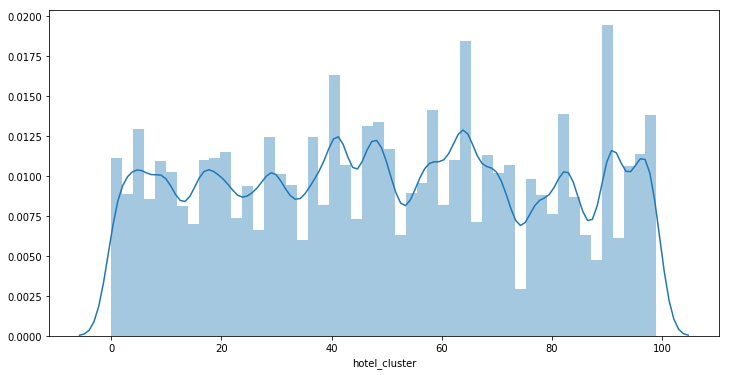

In [7]:
plt.figure(figsize=(12, 6))
sns.distplot(data_sample['hotel_cluster'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


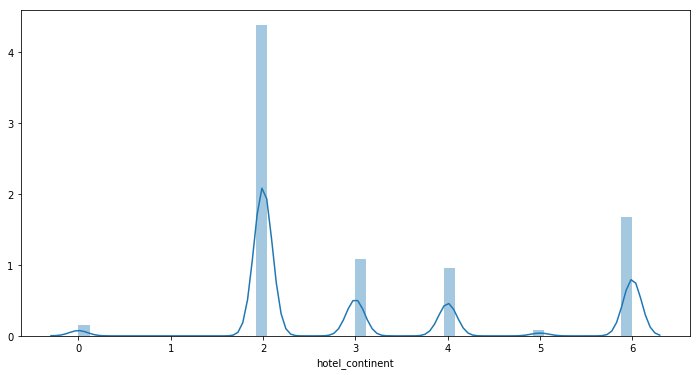

In [8]:
plt.figure(figsize=(12, 6))
sns.distplot(data_sample['hotel_continent'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


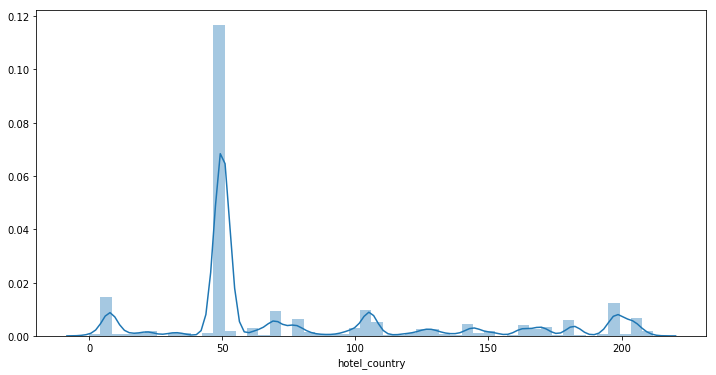

In [9]:
plt.figure(figsize=(12, 6))
sns.distplot(data_sample['hotel_country'])

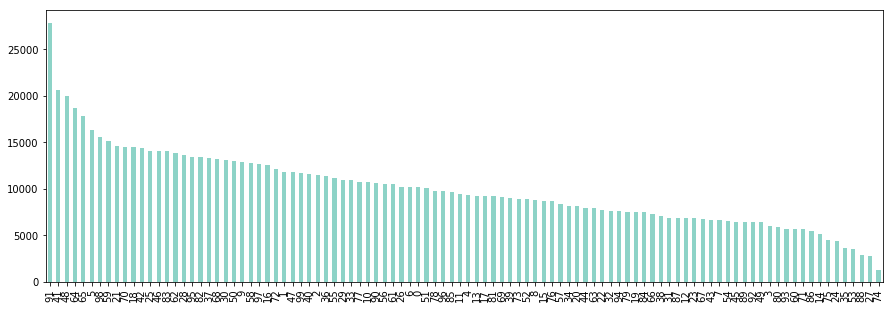

In [10]:
data_sample["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

In [11]:
# Check how many user IDs are present
data_sample["user_id"].unique().size

489945

In [12]:
data_sample['date_time'].dtypes
# The data type is a object.Convert the date_time column in train from an object to a datetime value.
#This makes it easier to work with as a date.

dtype('O')

In [13]:
data_sample["date_time"] = pd.to_datetime(data_sample["date_time"])
data_sample["year"] = data_sample["date_time"].dt.year
data_sample["month"] = data_sample["date_time"].dt.month

In [14]:
data_sample.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month
0,8879178,2014-03-21 15:11:37,2,3,66,174,24103,2211.6376,970569,0,...,15093,1,0,2,2,50,679,6,2014,3
1,37432400,2014-09-08 07:37:35,2,3,66,258,13134,1479.4293,381438,0,...,5405,6,0,1,4,8,126,65,2014,9
2,14622799,2014-10-17 15:30:05,10,0,182,416,32100,3163.3209,390956,0,...,22648,6,0,1,4,13,1531,62,2014,10
3,23090242,2014-05-18 13:49:51,8,4,77,871,20821,7692.1806,980271,0,...,8276,1,0,1,2,50,661,18,2014,5
4,15102426,2014-09-16 15:39:04,2,3,27,418,22879,NaN,530165,0,...,8550,6,1,1,4,8,121,21,2014,9


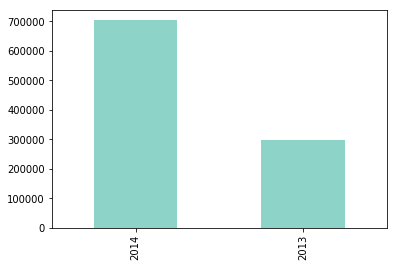

In [15]:
data_sample["year"].value_counts().plot(kind='bar',colormap="Set3")

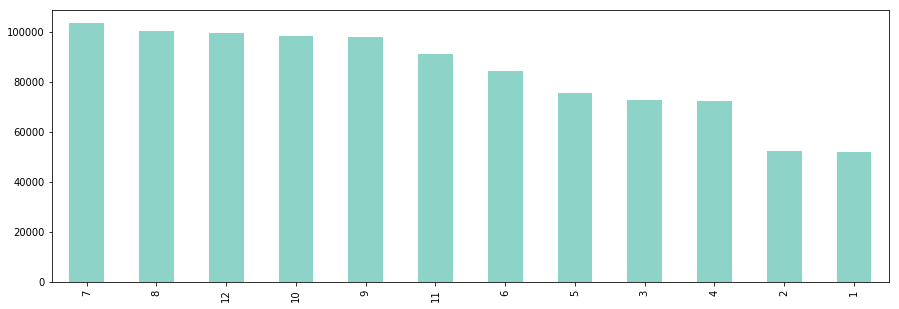

In [16]:
data_sample["month"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

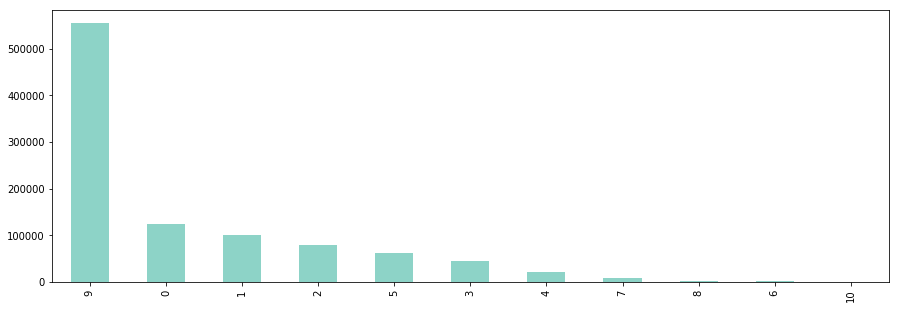

In [17]:
data_sample["channel"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

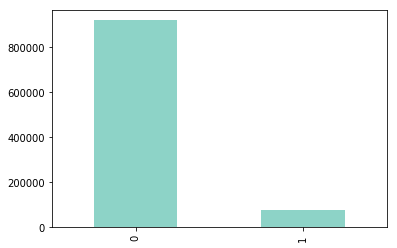

In [18]:
data_sample["is_booking"].value_counts().plot(kind='bar',colormap="Set3")


In [19]:
per_booking = sum(data_sample['is_booking'] == 1)/(sum(data_sample['is_booking'] == 0) + sum(data_sample['is_booking'] == 1))
per_booking*100

7.9401

In [20]:
data_sample.corr()["hotel_cluster"]

Unnamed: 0                   0.000512
site_name                   -0.021625
posa_continent               0.013687
user_location_country       -0.010046
user_location_region         0.006681
user_location_city           0.000723
orig_destination_distance    0.007052
user_id                      0.000121
is_mobile                    0.007444
is_package                   0.039591
channel                      0.001296
srch_adults_cnt              0.011740
srch_children_cnt            0.014750
srch_rm_cnt                 -0.006653
srch_destination_id         -0.010805
srch_destination_type_id    -0.033175
is_booking                  -0.021513
cnt                          0.002491
hotel_continent             -0.013824
hotel_country               -0.024189
hotel_market                 0.034893
hotel_cluster                1.000000
year                         0.000134
month                        0.000586
Name: hotel_cluster, dtype: float64

In [21]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [22]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="Two variables are DEPENDENT".format(colX)
        else:
            result="Two variables are INDEPENDENT".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


In [23]:
cT = ChiSquare(data_sample)

#Feature Selection
testColumns = ['is_package']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="is_booking" )

Two variables are DEPENDENT


In [24]:
testColumns = ['is_package','is_booking']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="hotel_cluster" )

Two variables are DEPENDENT
Two variables are DEPENDENT


# Data Cleaning and Preprocessing


In [25]:
data_sample.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month
0,8879178,2014-03-21 15:11:37,2,3,66,174,24103,2211.6376,970569,0,...,15093,1,0,2,2,50,679,6,2014,3
1,37432400,2014-09-08 07:37:35,2,3,66,258,13134,1479.4293,381438,0,...,5405,6,0,1,4,8,126,65,2014,9
2,14622799,2014-10-17 15:30:05,10,0,182,416,32100,3163.3209,390956,0,...,22648,6,0,1,4,13,1531,62,2014,10
3,23090242,2014-05-18 13:49:51,8,4,77,871,20821,7692.1806,980271,0,...,8276,1,0,1,2,50,661,18,2014,5
4,15102426,2014-09-16 15:39:04,2,3,27,418,22879,NaN,530165,0,...,8550,6,1,1,4,8,121,21,2014,9


In [26]:
data_sample.isna().sum()

Unnamed: 0                        0
date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    358724
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                        1252
srch_co                        1252
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
year                              0
month                             0
dtype: int64

In [27]:
data_sample['orig_destination_distance'] = data_sample['orig_destination_distance'].fillna(data_sample['orig_destination_distance'].mean())


In [28]:
data_sample = data_sample.loc[data_sample['srch_ci'].notnull(),]

In [29]:
data_sample.isna().sum()

Unnamed: 0                   0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
year                         0
month                        0
dtype: int64

In [30]:
data_sample.dtypes

Unnamed: 0                            int64
date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                              object
srch_co                              object
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
is_booking                            int64
cnt                                   int64
hotel_continent                       int64
hotel_country                   

In [31]:
from datetime import datetime

def compare_dates(date1,date2):
    date_format = '%Y-%m-%d'
    start_date = datetime.strptime(date1, date_format)  
    end_date = datetime.strptime(date2, date_format)
    diff = end_date - start_date
    return diff.days


data_sample['No_of_days'] = data_sample[['srch_ci','srch_co']].apply(lambda x: compare_dates(*x), axis=1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [32]:
data_sample.shape

(998748, 28)

In [33]:
data_sample.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,No_of_days
0,8879178,2014-03-21 15:11:37,2,3,66,174,24103,2211.637600,970569,0,...,1,0,2,2,50,679,6,2014,3,4
1,37432400,2014-09-08 07:37:35,2,3,66,258,13134,1479.429300,381438,0,...,6,0,1,4,8,126,65,2014,9,5
2,14622799,2014-10-17 15:30:05,10,0,182,416,32100,3163.320900,390956,0,...,6,0,1,4,13,1531,62,2014,10,3
3,23090242,2014-05-18 13:49:51,8,4,77,871,20821,7692.180600,980271,0,...,1,0,1,2,50,661,18,2014,5,2
4,15102426,2014-09-16 15:39:04,2,3,27,418,22879,1965.424895,530165,0,...,6,1,1,4,8,121,21,2014,9,2


In [34]:
data_sample['No_of_days'].dtypes

dtype('int64')

In [35]:
data_sample = data_sample.drop(columns=['Unnamed: 0'])
data_sample.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,No_of_days
0,2014-03-21 15:11:37,2,3,66,174,24103,2211.637600,970569,0,0,...,1,0,2,2,50,679,6,2014,3,4
1,2014-09-08 07:37:35,2,3,66,258,13134,1479.429300,381438,0,1,...,6,0,1,4,8,126,65,2014,9,5
2,2014-10-17 15:30:05,10,0,182,416,32100,3163.320900,390956,0,0,...,6,0,1,4,13,1531,62,2014,10,3
3,2014-05-18 13:49:51,8,4,77,871,20821,7692.180600,980271,0,0,...,1,0,1,2,50,661,18,2014,5,2
4,2014-09-16 15:39:04,2,3,27,418,22879,1965.424895,530165,0,0,...,6,1,1,4,8,121,21,2014,9,2


In [36]:
data_sample['Total_person'] = data_sample['srch_adults_cnt'] + data_sample['srch_children_cnt']

In [37]:
data_sample['Total_person'].corr(data_sample['srch_rm_cnt'])

0.4328502666108484

# Feature Selection


In [38]:
data_sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'year', 'month', 'No_of_days', 'Total_person'],
      dtype='object')

In [39]:
X = data_sample[['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'is_mobile', 'is_package',
       'channel','srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market','No_of_days', 'Total_person']]


In [40]:
Y = data_sample['hotel_cluster']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)

# Clustering Model - K means

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Finding out optimm value of K
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

In [ ]:
kmeans = KMeans(n_clusters=10) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)